In [1]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex7 import *

# Set up filepaths
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 

In [2]:
# Import helpful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 


In [3]:
# Load the data, and separate the target
train_data = '../input/train.csv'
# path to file you will use for predictions
test_data = '../input/test.csv'

# read test and train data file using pandas
test_data = pd.read_csv(test_data)
home_data = pd.read_csv(train_data)

# Plot null values

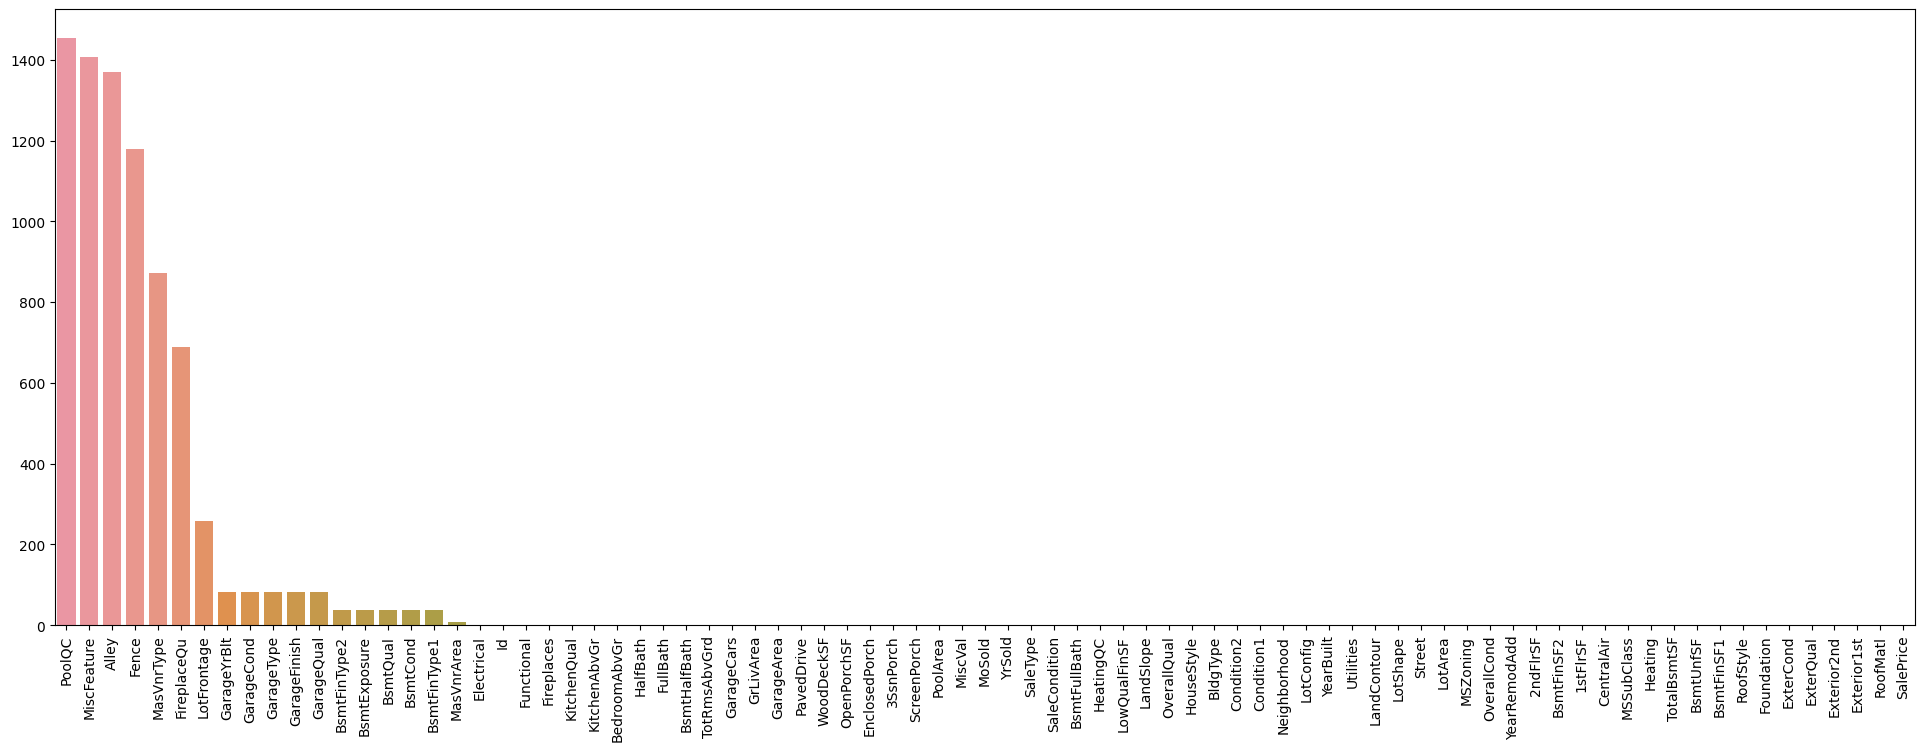

In [4]:
plt.figure(figsize=(24,8))
# columns with the most null values
cols_with_null=home_data.isnull().sum().sort_values(ascending=False)
# Let's visualize these columns
sns.barplot(x=cols_with_null.index,y=cols_with_null)
plt.xticks(rotation=90)
plt.show;

In [5]:
cols_with_null.head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [6]:
#Drop null values columns
cols_to_drop=(cols_with_null.head(6).index).tolist()
home_data.drop(cols_to_drop,axis=1,inplace=True)
test_data.drop(cols_to_drop,axis=1,inplace=True)

# Plot zero values

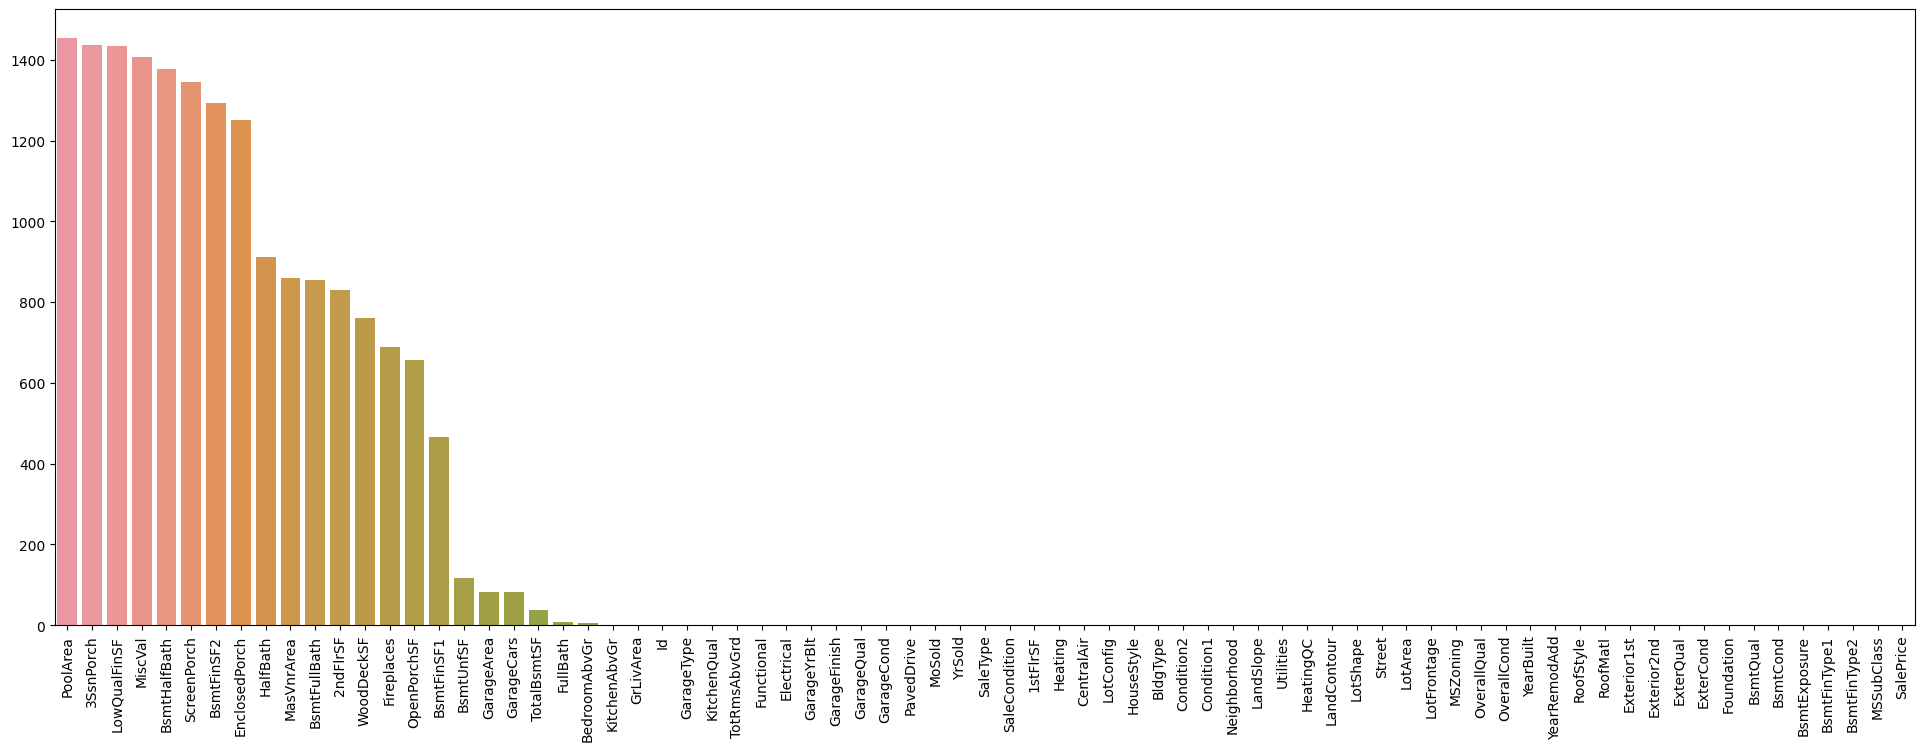

In [7]:
plt.figure(figsize=(24,8))
# columns with the most null values
cols_with_zero=home_data.eq(0).sum().sort_values(ascending=False)
# Let's visualize these columns
sns.barplot(x=cols_with_zero.index,y=cols_with_zero)
plt.xticks(rotation=90)
plt.show;

In [8]:
cols_with_zero.head(25)

PoolArea         1453
3SsnPorch        1436
LowQualFinSF     1434
MiscVal          1408
BsmtHalfBath     1378
ScreenPorch      1344
BsmtFinSF2       1293
EnclosedPorch    1252
HalfBath          913
MasVnrArea        861
BsmtFullBath      856
2ndFlrSF          829
WoodDeckSF        761
Fireplaces        690
OpenPorchSF       656
BsmtFinSF1        467
BsmtUnfSF         118
GarageArea         81
GarageCars         81
TotalBsmtSF        37
FullBath            9
BedroomAbvGr        6
KitchenAbvGr        1
GrLivArea           0
Id                  0
dtype: int64

In [9]:
#Drop null values columns
cols_to_drop2=(cols_with_zero.head(9).index).tolist()
home_data.drop(cols_to_drop2,axis=1,inplace=True)
test_data.drop(cols_to_drop2,axis=1,inplace=True)

In [10]:
# Extract numeric features
feature_names = [i for i in home_data.columns if home_data[i].dtype == np.int64 and i != "SalePrice"]

# Select columns corresponding to features
X = home_data[feature_names]  # Exclude 'SalePrice' from features
y = home_data['SalePrice']
Z = test_data[feature_names]  # Exclude 'SalePrice' from features

selector = SelectKBest(score_func=chi2, k='all')

# Fit the selector to the data and transform it
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features_indices = selector.get_support()
selected_feature_names = X.columns[selected_features_indices]

print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'YrSold'],
      dtype='object')


In [11]:
X = home_data[selected_feature_names]
Z = test_data[selected_feature_names]
X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,706,150,856,...,3,1,8,0,2,548,0,61,2,2008
1,2,20,9600,6,8,1976,1976,978,284,1262,...,3,1,6,1,2,460,298,0,5,2007
2,3,60,11250,7,5,2001,2002,486,434,920,...,3,1,6,1,2,608,0,42,9,2008
3,4,70,9550,7,5,1915,1970,216,540,756,...,3,1,7,1,3,642,0,35,2,2006
4,5,60,14260,8,5,2000,2000,655,490,1145,...,4,1,9,1,3,836,192,84,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,953,953,...,3,1,7,1,2,460,0,40,8,2007
1456,1457,20,13175,6,6,1978,1988,790,589,1542,...,3,1,7,2,2,500,349,0,2,2010
1457,1458,70,9042,7,9,1941,2006,275,877,1152,...,4,1,9,2,1,252,0,60,5,2010
1458,1459,20,9717,5,6,1950,1996,49,0,1078,...,2,1,5,0,1,240,366,0,4,2010


## Train the model make predictions

In [12]:
from sklearn.impute import SimpleImputer

# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
selected_feature_names
test_X = Z[selected_feature_names]


# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # You can use 'mean' or 'most_frequent' as well

# Fit and transform the test data
Z = imputer.fit_transform(Z)



In [13]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=40)
# Define a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(train_X, train_y)

rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
rf_test_predictions = rf_model.predict(Z)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 15,906


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [14]:
import eli5
from eli5.sklearn import PermutationImportance

# Permutation Importance to analyze the feature importance of the trained mode
perm = PermutationImportance(rf_model, random_state=1).fit(val_X, val_y)

# Generate the permutation importance weights and display them in a tree view
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.4724 ± 0.0448,OverallQual
0.1557 ± 0.0233,GrLivArea
0.0291 ± 0.0062,TotalBsmtSF
0.0185 ± 0.0163,GarageCars
0.0162 ± 0.0051,BsmtFinSF1
0.0147 ± 0.0026,YearBuilt
0.0118 ± 0.0172,2ndFlrSF
0.0106 ± 0.0081,1stFlrSF
0.0081 ± 0.0035,OverallCond
0.0057 ± 0.0023,YearRemodAdd
